# **Cheater and Non-Cheater**

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:

student_info = pd.read_csv('studentInfo.csv')
student_vle = pd.read_csv('studentVle.csv')
student_assess = pd.read_csv('studentAssessment.csv') 

In [8]:
student_assess.shape

(173912, 5)

In [9]:
student_info.shape

(32593, 12)

In [10]:
student_vle.shape

(10655280, 6)

In [11]:
student_info.sample()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
4429,BBB,2013J,609193,F,South Region,Lower Than A Level,80-90%,0-35,0,60,N,Withdrawn


In [12]:
student_info.sample()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
6793,BBB,2014J,551922,F,London Region,Lower Than A Level,40-50%,0-35,0,60,N,Pass


In [13]:
student_vle.sample()


,code_module,code_presentation,id_student,id_site,date,sum_click
10585485,GGG,2014J,198167,896972,96,1


In [14]:
student_assess.sample()

,id_assessment,id_student,date_submitted,is_banked,score
14740,14996,469878,17,0,79.0


In [15]:

# Calculate total clicks for each student
student_vle_total_clk_per_std = student_vle.groupby('id_student')['sum_click'].sum().reset_index()
student_vle_total_clk_per_std.shape

(26074, 2)

In [16]:
student_vle_total_clk_per_std

,id_student,sum_click
0,6516,2791
1,8462,656
2,11391,934
3,23629,161
4,23698,910
...,...,...
26069,2698251,1511
26070,2698257,758
26071,2698535,4241
26072,2698577,717


In [17]:
# merging student info and student vle (student_vle_total_clk_per_std)

merged_df = student_info.merge(student_vle_total_clk_per_std,on='id_student',how='inner')
print(merged_df.shape)

final_df = merged_df.merge(student_assess,on='id_student',how='inner')

(29741, 13)


In [18]:
final_df.shape

(207242, 17)

In [19]:
f = final_df[~final_df['score'].isnull()]

In [20]:
f.sample(2)

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,sum_click,id_assessment,date_submitted,is_banked,score
117334,DDD,2014J,399794,F,Scotland,HE Qualification,10-20,0-35,1,60,N,Fail,1467,25348,25,0,66.0
186845,FFF,2014J,656734,F,South West Region,Lower Than A Level,70-80%,0-35,0,120,N,Distinction,7120,34904,40,0,87.0


#### Saving Preprocessed data

In [229]:
preprocess_data.sample(2)

,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,sum_click,score,is_cheater
102722,1501577,M,South West Region,A Level or Equivalent,70-80%,35-55,0,120,N,Distinction,6182,93.0,0
4715,292027,M,East Midlands Region,Lower Than A Level,40-50%,0-35,0,60,N,Withdrawn,108,80.0,0


In [232]:
preprocess_data.to_csv("Student_Clean_Data.csv")

In [233]:
preprocess_data[['imd_band','age_band','disability']] = f[['imd_band','age_band','disability']]

In [21]:
final_df

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,sum_click,id_assessment,date_submitted,is_banked,score
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,934,1752,18,0,78.0
1,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,934,1753,53,0,85.0
2,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,934,1754,115,0,80.0
3,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,934,1755,164,0,85.0
4,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,934,1756,212,0,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207237,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction,616,37437,169,0,60.0
207238,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction,616,37438,73,0,100.0
207239,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction,616,37439,150,0,60.0
207240,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction,616,37440,172,0,100.0


In [22]:
final_df.isnull().sum()

code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                9314
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
sum_click                  0
id_assessment              0
date_submitted             0
is_banked                  0
score                    226
dtype: int64

In [23]:
final_df.sample(2)

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,sum_click,id_assessment,date_submitted,is_banked,score
85173,EEE,2014B,577460,M,North Region,HE Qualification,50-60%,0-35,1,60,N,Distinction,4980,24291,31,0,90.0
4154,BBB,2013B,187793,F,North Western Region,Lower Than A Level,10-20,35-55,1,120,Y,Fail,2817,14992,95,0,80.0


<Axes: xlabel='imd_band'>

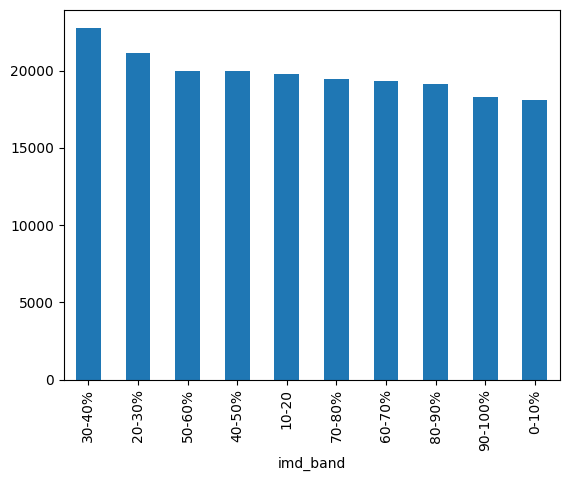

In [24]:
final_df['imd_band'].value_counts().plot(kind='bar')

In [25]:
imd_null = final_df[final_df['imd_band'].isnull()]

In [26]:
imd_null.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,sum_click,id_assessment,date_submitted,is_banked,score
40,AAA,2013J,53025,M,North Region,Post Graduate Qualification,NaN,55<=,0,60,N,Pass,3158,1752,9,0,71.0
41,AAA,2013J,53025,M,North Region,Post Graduate Qualification,NaN,55<=,0,60,N,Pass,3158,1753,52,0,80.0
42,AAA,2013J,53025,M,North Region,Post Graduate Qualification,NaN,55<=,0,60,N,Pass,3158,1754,114,0,78.0
43,AAA,2013J,53025,M,North Region,Post Graduate Qualification,NaN,55<=,0,60,N,Pass,3158,1755,161,0,80.0
44,AAA,2013J,53025,M,North Region,Post Graduate Qualification,NaN,55<=,0,60,N,Pass,3158,1756,212,0,81.0


In [27]:
imd_null.groupby('gender')['id_student'].count()

gender
F    2371
M    6943
Name: id_student, dtype: int64

In [28]:
imd_null.groupby('final_result')['id_student'].count()

final_result
Distinction    2179
Fail            803
Pass           5516
Withdrawn       816
Name: id_student, dtype: int64

In [29]:
imd_null.groupby('highest_education')['id_student'].count()

highest_education
A Level or Equivalent          2478
HE Qualification               2365
Lower Than A Level             3166
No Formal quals                 171
Post Graduate Qualification    1134
Name: id_student, dtype: int64

In [30]:
final_df[final_df['imd_band'].notnull()][['gender','imd_band']].groupby('gender')['imd_band'].count()

gender
F     86047
M    111881
Name: imd_band, dtype: int64

In [31]:
final_df['imd_band'].mode()

0    30-40%
Name: imd_band, dtype: object

In [32]:
final_df.dtypes

code_module              object
code_presentation        object
id_student                int64
gender                   object
region                   object
highest_education        object
imd_band                 object
age_band                 object
num_of_prev_attempts      int64
studied_credits           int64
disability               object
final_result             object
sum_click                 int64
id_assessment             int64
date_submitted            int64
is_banked                 int64
score                   float64
dtype: object

In [33]:
final_df[['imd_band','score']]

,imd_band,score
0,90-100%,78.0
1,90-100%,85.0
2,90-100%,80.0
3,90-100%,85.0
4,90-100%,82.0
...,...,...
207237,50-60%,60.0
207238,50-60%,100.0
207239,50-60%,60.0
207240,50-60%,100.0


In [34]:

final_df

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,sum_click,id_assessment,date_submitted,is_banked,score
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,934,1752,18,0,78.0
1,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,934,1753,53,0,85.0
2,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,934,1754,115,0,80.0
3,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,934,1755,164,0,85.0
4,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,934,1756,212,0,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207237,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction,616,37437,169,0,60.0
207238,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction,616,37438,73,0,100.0
207239,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction,616,37439,150,0,60.0
207240,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction,616,37440,172,0,100.0


In [35]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207242 entries, 0 to 207241
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   code_module           207242 non-null  object 
 1   code_presentation     207242 non-null  object 
 2   id_student            207242 non-null  int64  
 3   gender                207242 non-null  object 
 4   region                207242 non-null  object 
 5   highest_education     207242 non-null  object 
 6   imd_band              197928 non-null  object 
 7   age_band              207242 non-null  object 
 8   num_of_prev_attempts  207242 non-null  int64  
 9   studied_credits       207242 non-null  int64  
 10  disability            207242 non-null  object 
 11  final_result          207242 non-null  object 
 12  sum_click             207242 non-null  int64  
 13  id_assessment         207242 non-null  int64  
 14  date_submitted        207242 non-null  int64  
 15  

In [36]:
relevant_columns = [
    'id_student', 'gender', 'region', 'highest_education', 
    'imd_band', 'age_band', 'num_of_prev_attempts', 
    'studied_credits', 'disability', 'final_result', 
    'sum_click', 'score'
]

# Selecting only relevant columns
final_df = final_df[relevant_columns]

In [37]:
final_df.head()

,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,sum_click,score
0,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,934,78.0
1,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,934,85.0
2,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,934,80.0
3,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,934,85.0
4,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,934,82.0


In [38]:
preprocess_data = final_df.copy()

In [39]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207242 entries, 0 to 207241
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id_student            207242 non-null  int64  
 1   gender                207242 non-null  object 
 2   region                207242 non-null  object 
 3   highest_education     207242 non-null  object 
 4   imd_band              197928 non-null  object 
 5   age_band              207242 non-null  object 
 6   num_of_prev_attempts  207242 non-null  int64  
 7   studied_credits       207242 non-null  int64  
 8   disability            207242 non-null  object 
 9   final_result          207242 non-null  object 
 10  sum_click             207242 non-null  int64  
 11  score                 207016 non-null  float64
dtypes: float64(1), int64(4), object(7)
memory usage: 19.0+ MB


In [40]:
final_df

,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,sum_click,score
0,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,934,78.0
1,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,934,85.0
2,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,934,80.0
3,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,934,85.0
4,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,934,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...
207237,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction,616,60.0
207238,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction,616,100.0
207239,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction,616,60.0
207240,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction,616,100.0


In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [42]:
final_df[final_df['imd_band'].isna()]

,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,sum_click,score
40,53025,M,North Region,Post Graduate Qualification,NaN,55<=,0,60,N,Pass,3158,71.0
41,53025,M,North Region,Post Graduate Qualification,NaN,55<=,0,60,N,Pass,3158,80.0
42,53025,M,North Region,Post Graduate Qualification,NaN,55<=,0,60,N,Pass,3158,78.0
43,53025,M,North Region,Post Graduate Qualification,NaN,55<=,0,60,N,Pass,3158,80.0
44,53025,M,North Region,Post Graduate Qualification,NaN,55<=,0,60,N,Pass,3158,81.0
...,...,...,...,...,...,...,...,...,...,...,...,...
206088,683974,F,North Region,Lower Than A Level,NaN,0-35,0,30,N,Distinction,1106,100.0
206089,683974,F,North Region,Lower Than A Level,NaN,0-35,0,30,N,Distinction,1106,100.0
206090,683974,F,North Region,Lower Than A Level,NaN,0-35,0,30,N,Distinction,1106,100.0
206091,683974,F,North Region,Lower Than A Level,NaN,0-35,0,30,N,Distinction,1106,80.0


In [43]:
# Separate data with and without missing `imd_band`
data_with_imd = final_df.dropna(subset=['imd_band'])   # this remove the imd_band missing rows
data_without_imd = final_df[final_df['imd_band'].isna()]

# Selecting features for the model
features = ['gender', 'region', 'highest_education', 'age_band', 
            'num_of_prev_attempts', 'studied_credits', 'disability', 
            'sum_click', 'score']

# Encoding categorical features
encoder = LabelEncoder()
for col in ['gender', 'region', 'highest_education', 'age_band', 'disability']:
    data_with_imd[col] = encoder.fit_transform(data_with_imd[col])
    data_without_imd[col] = encoder.transform(data_without_imd[col].fillna("Unknown"))


C:\Users\PMYLS\AppData\Local\Temp\ipykernel_7568\1194260290.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_with_imd[col] = encoder.fit_transform(data_with_imd[col])
C:\Users\PMYLS\AppData\Local\Temp\ipykernel_7568\1194260290.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_without_imd[col] = encoder.transform(data_without_imd[col].fillna("Unknown"))
C:\Users\PMYLS\AppData\Local\Temp\ipykernel_7568\1194260290.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [44]:
data_with_imd.sample()

,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,sum_click,score
64494,600938,1,6,1,60-70%,0,0,90,0,Pass,2758,73.0


In [45]:
data_without_imd.sample()

,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,sum_click,score
110561,532491,1,11,0,NaN,0,0,60,0,Pass,3103,78.0


In [46]:
final_df

,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,sum_click,score
0,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,934,78.0
1,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,934,85.0
2,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,934,80.0
3,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,934,85.0
4,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,934,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...
207237,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction,616,60.0
207238,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction,616,100.0
207239,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction,616,60.0
207240,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction,616,100.0


In [47]:
data_with_imd

,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,sum_click,score
0,11391,1,0,1,90-100%,2,0,240,0,Pass,934,78.0
1,11391,1,0,1,90-100%,2,0,240,0,Pass,934,85.0
2,11391,1,0,1,90-100%,2,0,240,0,Pass,934,80.0
3,11391,1,0,1,90-100%,2,0,240,0,Pass,934,85.0
4,11391,1,0,1,90-100%,2,0,240,0,Pass,934,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...
207237,2684003,0,12,1,50-60%,1,0,30,0,Distinction,616,60.0
207238,2684003,0,12,1,50-60%,1,0,30,0,Distinction,616,100.0
207239,2684003,0,12,1,50-60%,1,0,30,0,Distinction,616,60.0
207240,2684003,0,12,1,50-60%,1,0,30,0,Distinction,616,100.0


In [48]:
data_without_imd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9314 entries, 40 to 206092
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id_student            9314 non-null   int64  
 1   gender                9314 non-null   int32  
 2   region                9314 non-null   int32  
 3   highest_education     9314 non-null   int32  
 4   imd_band              0 non-null      object 
 5   age_band              9314 non-null   int32  
 6   num_of_prev_attempts  9314 non-null   int64  
 7   studied_credits       9314 non-null   int64  
 8   disability            9314 non-null   int32  
 9   final_result          9314 non-null   object 
 10  sum_click             9314 non-null   int64  
 11  score                 9313 non-null   float64
dtypes: float64(1), int32(5), int64(4), object(2)
memory usage: 764.0+ KB


In [49]:

# Splitting the data (Train model only on data with known values)
X = data_with_imd[features]
y = data_with_imd['imd_band']

# Train-test split for model evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [50]:
X_train.shape,X_test.shape

((158342, 9), (39586, 9))

In [51]:
X_train

,gender,region,highest_education,age_band,num_of_prev_attempts,studied_credits,disability,sum_click,score
88287,1,9,0,0,0,60,0,1401,88.0
180988,1,10,1,0,0,60,0,2118,80.0
102516,1,1,1,1,0,30,0,1646,76.0
22053,0,1,2,1,0,60,0,211,62.0
96698,1,8,0,0,0,120,0,2873,54.0
...,...,...,...,...,...,...,...,...,...
125111,1,5,2,0,0,60,0,2074,96.0
107816,1,8,0,1,0,60,0,4071,54.0
137915,0,4,2,0,0,60,0,2022,86.0
153870,1,1,0,0,1,220,0,2284,93.0


In [52]:

# Training the model (Random Forest)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluating model performance
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 85.54%


In [53]:
data_without_imd[features]

,gender,region,highest_education,age_band,num_of_prev_attempts,studied_credits,disability,sum_click,score
40,1,4,4,2,0,60,0,3158,71.0
41,1,4,4,2,0,60,0,3158,80.0
42,1,4,4,2,0,60,0,3158,78.0
43,1,4,4,2,0,60,0,3158,80.0
44,1,4,4,2,0,60,0,3158,81.0
...,...,...,...,...,...,...,...,...,...
206088,0,4,2,0,0,30,0,1106,100.0
206089,0,4,2,0,0,30,0,1106,100.0
206090,0,4,2,0,0,30,0,1106,100.0
206091,0,4,2,0,0,30,0,1106,80.0


In [54]:

# Predicting missing values in `imd_band`
X_missing = data_without_imd[features]
predicted_imd = model.predict(X_missing)
print(predicted_imd.shape)
print(predicted_imd)

(9314,)
['20-30%' '20-30%' '20-30%' ... '30-40%' '10-20' '30-40%']


In [55]:
preprocess_data.isnull().sum()

id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                9314
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
sum_click                  0
score                    226
dtype: int64

In [56]:

# Filling the missing values with predicted values
data_without_imd['imd_band'] = predicted_imd

# Combining the two datasets
final_df = pd.concat([data_with_imd, data_without_imd])



C:\Users\PMYLS\AppData\Local\Temp\ipykernel_7568\2234245146.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_without_imd['imd_band'] = predicted_imd


In [57]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 207242 entries, 0 to 206092
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id_student            207242 non-null  int64  
 1   gender                207242 non-null  int32  
 2   region                207242 non-null  int32  
 3   highest_education     207242 non-null  int32  
 4   imd_band              207242 non-null  object 
 5   age_band              207242 non-null  int32  
 6   num_of_prev_attempts  207242 non-null  int64  
 7   studied_credits       207242 non-null  int64  
 8   disability            207242 non-null  int32  
 9   final_result          207242 non-null  object 
 10  sum_click             207242 non-null  int64  
 11  score                 207016 non-null  float64
dtypes: float64(1), int32(5), int64(4), object(2)
memory usage: 16.6+ MB


<Axes: xlabel='imd_band'>

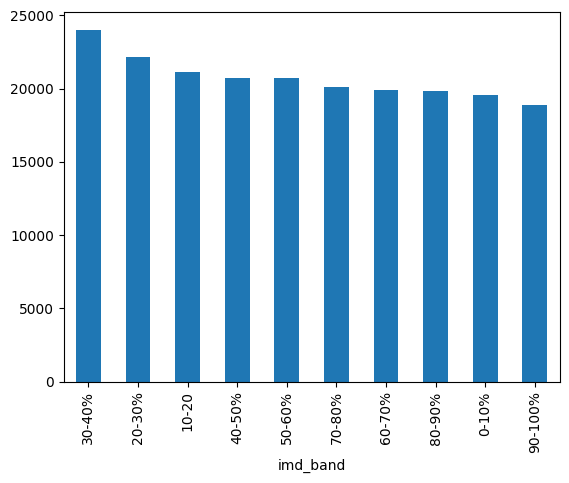

In [58]:
final_df['imd_band'].value_counts().plot(kind='bar')

In [59]:
final_df.isnull().sum()

id_student                0
gender                    0
region                    0
highest_education         0
imd_band                  0
age_band                  0
num_of_prev_attempts      0
studied_credits           0
disability                0
final_result              0
sum_click                 0
score                   226
dtype: int64

### REMOVING THE ROWS IN SCORE COLUMN

In [60]:
final_df = final_df[~final_df['score'].isnull()]

In [61]:
preprocess_data = final_df.copy()

In [62]:
final_df.isnull().sum()

id_student              0
gender                  0
region                  0
highest_education       0
imd_band                0
age_band                0
num_of_prev_attempts    0
studied_credits         0
disability              0
final_result            0
sum_click               0
score                   0
dtype: int64

In [63]:
# now our data becomes clean 

final_df.dtypes

id_student                int64
gender                    int32
region                    int32
highest_education         int32
imd_band                 object
age_band                  int32
num_of_prev_attempts      int64
studied_credits           int64
disability                int32
final_result             object
sum_click                 int64
score                   float64
dtype: object

In [64]:
final_df.describe()

,id_student,gender,region,highest_education,age_band,num_of_prev_attempts,studied_credits,disability,sum_click,score
count,2.070160e+05,207016.000000,207016.000000,207016.000000,207016.000000,207016.000000,207016.000000,207016.000000,207016.000000,207016.000000
mean,7.048019e+05,0.573361,5.854403,0.950361,0.315908,0.156297,78.136231,0.091404,2415.882854,75.405640
std,5.505448e+05,0.494590,3.667905,0.981046,0.480593,0.460129,37.985232,0.288183,2506.544991,19.080316
min,6.516000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,0.000000,1.000000,0.000000
25%,5.067050e+05,0.000000,3.000000,0.000000,0.000000,0.000000,60.000000,0.000000,714.000000,65.000000
50%,5.854640e+05,1.000000,6.000000,1.000000,0.000000,0.000000,60.000000,0.000000,1628.000000,79.000000
75%,6.334590e+05,1.000000,9.000000,2.000000,1.000000,0.000000,90.000000,0.000000,3305.000000,89.000000
max,2.698588e+06,1.000000,12.000000,4.000000,2.000000,6.000000,630.000000,1.000000,28615.000000,100.000000


In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

lb_encoder = LabelEncoder()

final_df['final_result'] = lb_encoder.fit_transform(final_df['final_result'])
final_df['imd_band'] = lb_encoder.fit_transform(final_df['imd_band'])

# **Detecting Anomally and Cheater**

In [66]:
from sklearn.ensemble import IsolationForest

In [67]:
features = ['gender','disability','imd_band','age_band','region', 'sum_click', 'score', 'num_of_prev_attempts', 'studied_credits']

X = final_df[features]
X

,gender,disability,imd_band,age_band,region,sum_click,score,num_of_prev_attempts,studied_credits
0,1,0,9,2,0,934,78.0,0,240
1,1,0,9,2,0,934,85.0,0,240
2,1,0,9,2,0,934,80.0,0,240
3,1,0,9,2,0,934,85.0,0,240
4,1,0,9,2,0,934,82.0,0,240
...,...,...,...,...,...,...,...,...,...
206088,0,0,3,0,4,1106,100.0,0,30
206089,0,0,3,0,4,1106,100.0,0,30
206090,0,0,3,0,4,1106,100.0,0,30
206091,0,0,1,0,4,1106,80.0,0,30


In [68]:
# Initializing the Isolation Forest model
iso_forest = IsolationForest(contamination=0.005, random_state=42)  # 5% expected as cheaters
final_df['is_cheater'] = iso_forest.fit_predict(X)


In [69]:
# Mapping -1 to Cheater (1) and 1 to Non-Cheater (0)
final_df['is_cheater'] = final_df['is_cheater'].apply(lambda x: 1 if x == -1 else 0)

In [70]:
preprocess_data['is_cheater'] = final_df['is_cheater']

In [73]:
preprocess_data.isnull().sum()

id_student              0
gender                  0
region                  0
highest_education       0
imd_band                0
age_band                0
num_of_prev_attempts    0
studied_credits         0
disability              0
final_result            0
sum_click               0
score                   0
is_cheater              0
dtype: int64

In [76]:
preprocess_data

,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,sum_click,score,is_cheater
0,11391,1,0,1,90-100%,2,0,240,0,Pass,934,78.0,0
1,11391,1,0,1,90-100%,2,0,240,0,Pass,934,85.0,0
2,11391,1,0,1,90-100%,2,0,240,0,Pass,934,80.0,0
3,11391,1,0,1,90-100%,2,0,240,0,Pass,934,85.0,0
4,11391,1,0,1,90-100%,2,0,240,0,Pass,934,82.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
206088,683974,0,4,2,30-40%,0,0,30,0,Distinction,1106,100.0,0
206089,683974,0,4,2,30-40%,0,0,30,0,Distinction,1106,100.0,0
206090,683974,0,4,2,30-40%,0,0,30,0,Distinction,1106,100.0,0
206091,683974,0,4,2,10-20,0,0,30,0,Distinction,1106,80.0,0


In [285]:
final_df['is_cheater'].value_counts()

is_cheater
0    205983
1      1033
Name: count, dtype: int64

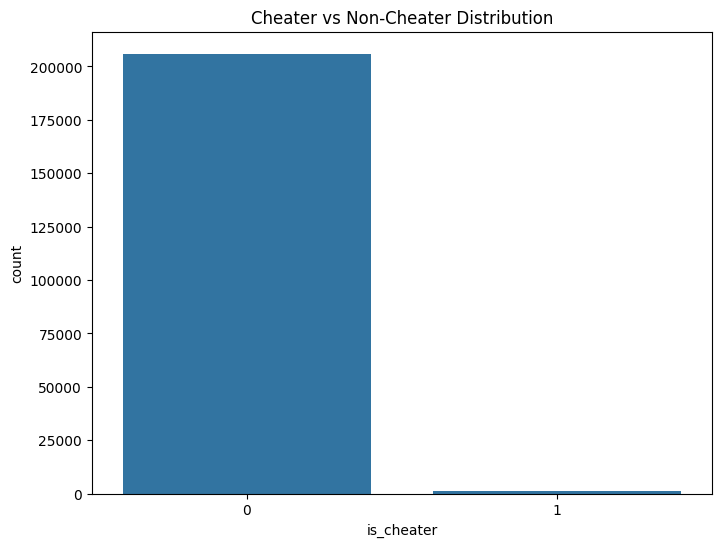

In [286]:
plt.figure(figsize=(8, 6))
sns.countplot(data=final_df, x='is_cheater')
plt.title("Cheater vs Non-Cheater Distribution")
plt.show()

In [287]:
# Displaying the number of cheaters detected



print("Number of Cheaters  Detected:", final_df['is_cheater'].sum())

Number of Cheaters  Detected: 1033


In [288]:
final_df

,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,sum_click,score,is_cheater
0,11391,1,0,1,9,2,0,240,0,2,934,78.0,0
1,11391,1,0,1,9,2,0,240,0,2,934,85.0,0
2,11391,1,0,1,9,2,0,240,0,2,934,80.0,0
3,11391,1,0,1,9,2,0,240,0,2,934,85.0,0
4,11391,1,0,1,9,2,0,240,0,2,934,82.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
206088,683974,0,4,2,3,0,0,30,0,0,1106,100.0,0
206089,683974,0,4,2,3,0,0,30,0,0,1106,100.0,0
206090,683974,0,4,2,3,0,0,30,0,0,1106,100.0,0
206091,683974,0,4,2,1,0,0,30,0,0,1106,80.0,0


In [289]:
final_df[final_df['is_cheater']==1].sample(10)

,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,sum_click,score,is_cheater
128753,385019,0,10,2,1,1,2,60,1,1,129,10.0,1
115267,2547402,1,7,2,5,0,2,180,1,2,912,61.0,1
108398,466158,0,8,2,3,0,2,180,1,3,1053,36.0,1
169068,2487982,1,7,1,3,1,4,60,0,2,14807,84.0,1
145406,511762,1,4,2,1,0,1,270,1,0,5356,90.0,1
148547,543010,1,0,1,3,1,2,120,0,1,14696,49.0,1
80901,537811,0,1,0,5,0,0,120,1,0,25159,100.0,1
145666,517850,0,4,2,0,0,1,210,1,1,3284,80.0,1
16234,47855,0,6,2,1,1,3,300,0,3,12,20.0,1
169323,2630284,0,1,0,0,1,5,150,0,3,549,76.0,1


In [290]:
final_df[final_df['is_cheater']==1].sample(10)

,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,sum_click,score,is_cheater
118302,498793,1,10,2,1,1,1,240,1,3,1899,44.0,1
150936,556492,1,8,0,9,0,2,240,0,1,5171,0.0,1
143643,443696,0,3,0,8,0,1,360,0,1,12021,90.0,1
15120,1993672,0,11,2,0,1,3,60,1,3,1503,100.0,1
16227,47855,0,6,2,1,1,3,300,0,3,12,53.0,1
127918,2696376,0,3,2,8,0,3,210,0,1,282,39.0,1
123166,2366701,0,9,1,4,1,1,190,1,3,28,39.0,1
145598,517269,1,12,2,0,1,1,180,1,2,21123,81.0,1
80881,537811,0,1,0,5,0,0,120,1,0,25159,100.0,1
118283,496315,1,8,0,9,0,1,60,1,1,13,12.0,1


In [291]:
final_df['final_result'].value_counts()

final_result
2    117975
1     32851
0     30343
3     25847
Name: count, dtype: int64

In [292]:
final_df['age_band'].value_counts()

age_band
0    143156
1     62322
2      1538
Name: count, dtype: int64

In [293]:
final_df['num_of_prev_attempts'].value_counts()

num_of_prev_attempts
0    181073
1     20924
2      3986
3       753
4       215
5        49
6        16
Name: count, dtype: int64

In [294]:
final_df['disability'].value_counts()

disability
0    188094
1     18922
Name: count, dtype: int64

In [295]:
final_df['final_result'].value_counts()

final_result
2    117975
1     32851
0     30343
3     25847
Name: count, dtype: int64

In [296]:
final_df['region'].value_counts()

region
6     22676
0     21404
8     20853
3     19501
5     16841
9     15919
11    15577
1     14696
7     13697
10    12950
4     12250
12    12137
2      8515
Name: count, dtype: int64

In [297]:
final_df['highest_education'].value_counts()

highest_education
0    95261
2    73612
1    33812
4     2711
3     1620
Name: count, dtype: int64

# Training Model

In [298]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder


In [299]:
scaler = StandardScaler()
lb_encoder = LabelEncoder()
oe = OrdinalEncoder()

In [300]:
final_df['studied_credits']

0         240
1         240
2         240
3         240
4         240
         ... 
206088     30
206089     30
206090     30
206091     30
206092     30
Name: studied_credits, Length: 207016, dtype: int64

In [301]:
# scaling three columns

final_df[['studied_credits','sum_click','score']] = scaler.fit_transform(final_df[['studied_credits','sum_click','score']])

In [302]:
final_df.sample()

,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,sum_click,score,is_cheater
71689,1187586,1,6,1,8,2,0,0.312327,0,0,0.137687,0.764893,0


In [303]:
final_df.dtypes

id_student                int64
gender                    int32
region                    int32
highest_education         int32
imd_band                  int32
age_band                  int32
num_of_prev_attempts      int64
studied_credits         float64
disability                int32
final_result              int32
sum_click               float64
score                   float64
is_cheater                int64
dtype: object

In [304]:
# Applying label encoding on Final Result column

# final_df['final_result'] = lb_encoder.fit_transform(final_df['final_result'])
# final_df['imd_band'] = lb_encoder.fit_transform(final_df['imd_band'])

In [305]:
final_df['final_result'].value_counts()

final_result
2    117975
1     32851
0     30343
3     25847
Name: count, dtype: int64

In [306]:
final_df.dtypes

id_student                int64
gender                    int32
region                    int32
highest_education         int32
imd_band                  int32
age_band                  int32
num_of_prev_attempts      int64
studied_credits         float64
disability                int32
final_result              int32
sum_click               float64
score                   float64
is_cheater                int64
dtype: object

In [307]:
final_df.sample()

,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,sum_click,score,is_cheater
99912,682569,1,8,0,2,1,0,1.102109,0,2,1.778196,1.026944,0


In [308]:
final_df['imd_band']

0         9
1         9
2         9
3         9
4         9
         ..
206088    3
206089    3
206090    3
206091    1
206092    3
Name: imd_band, Length: 207016, dtype: int32

# Splitting data and Applying Model 

In [309]:
X = final_df.drop(['id_student','is_cheater'],axis=1)
y = final_df['is_cheater']

In [310]:
X.head()

,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,sum_click,score
0,1,0,1,9,2,0,4.261239,0,2,-0.591207,0.135971
1,1,0,1,9,2,0,4.261239,0,2,-0.591207,0.502842
2,1,0,1,9,2,0,4.261239,0,2,-0.591207,0.240791
3,1,0,1,9,2,0,4.261239,0,2,-0.591207,0.502842
4,1,0,1,9,2,0,4.261239,0,2,-0.591207,0.345611


In [311]:
y.sample(5)

200347    0
96012     0
38277     0
106823    0
100386    0
Name: is_cheater, dtype: int64

In [312]:
# train test split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42)

In [313]:
X_train.head()

,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,sum_click,score
204909,0,5,2,3,1,0,-1.267238,0,2,-0.870077,1.288994
56672,1,11,1,2,0,0,-0.477456,0,1,-0.570062,-0.440541
104980,0,6,0,4,0,0,1.102109,0,2,-0.079346,-0.283310
17893,0,7,1,3,0,0,-0.477456,0,2,-0.788690,0.240791
68988,1,11,1,5,0,0,-0.477456,0,2,-0.520591,-0.126080


In [314]:
y_train.head()

204909    0
56672     0
104980    0
17893     0
68988     0
Name: is_cheater, dtype: int64

In [315]:
X_test.head()

,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,sum_click,score
44072,0,4,0,3,0,0,1.102109,0,1,-0.837762,1.288994
115,1,8,2,7,1,1,-0.477456,0,2,-0.469126,-0.440541
58637,1,0,1,6,1,0,-0.477456,0,2,1.601458,1.288994
121062,0,6,2,5,0,0,-0.477456,0,1,-0.874466,-1.121873
105753,1,1,0,7,0,0,-0.477456,0,1,-0.755577,-0.335721


In [316]:
y_test.head()

44072     0
115       0
58637     0
121062    0
105753    0
Name: is_cheater, dtype: int64

# **Applying Model**

In [317]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [318]:
lr = LogisticRegression()
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()

In [319]:
lr.fit(X_train,y_train)
rf.fit(X_train,y_train)
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [320]:
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_dt = dt.predict(X_test)

In [321]:
from sklearn.metrics import accuracy_score, classification_report

In [322]:
print(f"Accuracy for lr: {accuracy_score(y_test,y_pred_lr)}")
print(f"Accuracy for rf: {accuracy_score(y_test,y_pred_rf)}")
print(f"Accuracy for dt: {accuracy_score(y_test,y_pred_dt)}")

Accuracy for lr: 0.9969326635107719
Accuracy for rf: 0.9991788233020964
Accuracy for dt: 0.9988406917206067


In [323]:
print(f"Classification report for lr\n:{classification_report(y_test,y_pred_lr)}")
print("*"*70)
print(f"Classification report for rf\n:{classification_report(y_test,y_pred_rf)}")
print("*"*70)
print(f"Classification report for dt\n:{classification_report(y_test,y_pred_dt)}")

Classification report for lr
:              precision    recall  f1-score   support

           0       1.00      1.00      1.00     41185
           1       0.81      0.55      0.65       219

    accuracy                           1.00     41404
   macro avg       0.90      0.77      0.83     41404
weighted avg       1.00      1.00      1.00     41404

**********************************************************************
Classification report for rf
:              precision    recall  f1-score   support

           0       1.00      1.00      1.00     41185
           1       0.96      0.88      0.92       219

    accuracy                           1.00     41404
   macro avg       0.98      0.94      0.96     41404
weighted avg       1.00      1.00      1.00     41404

**********************************************************************
Classification report for dt
:              precision    recall  f1-score   support

           0       1.00      1.00      1.00     41185
     

In [324]:
print(f"Classification report for dt\n:{classification_report(y_test,y_pred_dt)}")

Classification report for dt
:              precision    recall  f1-score   support

           0       1.00      1.00      1.00     41185
           1       0.89      0.89      0.89       219

    accuracy                           1.00     41404
   macro avg       0.94      0.95      0.95     41404
weighted avg       1.00      1.00      1.00     41404



In [325]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [326]:
final_df

,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,sum_click,score,is_cheater
0,11391,1,0,1,9,2,0,4.261239,0,2,-0.591207,0.135971,0
1,11391,1,0,1,9,2,0,4.261239,0,2,-0.591207,0.502842,0
2,11391,1,0,1,9,2,0,4.261239,0,2,-0.591207,0.240791,0
3,11391,1,0,1,9,2,0,4.261239,0,2,-0.591207,0.502842,0
4,11391,1,0,1,9,2,0,4.261239,0,2,-0.591207,0.345611,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
206088,683974,0,4,2,3,0,0,-1.267238,0,0,-0.522586,1.288994,0
206089,683974,0,4,2,3,0,0,-1.267238,0,0,-0.522586,1.288994,0
206090,683974,0,4,2,3,0,0,-1.267238,0,0,-0.522586,1.288994,0
206091,683974,0,4,2,1,0,0,-1.267238,0,0,-0.522586,0.240791,0


In [327]:


# Separate features and target
X = final_df.drop("target_column", axis=1)  # replace with your actual target column name
y = final_df["target_column"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=["object", "category"]).columns
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns

# Preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ]
)

# Create the pipeline
rf_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(n_estimators=100, random_state=42))
])

# Fit the model
rf_pipeline.fit(X_train, y_train)

# Predictions
y_pred = rf_pipeline.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


KeyError: "['target_column'] not found in axis"